# I] Import and options


In [1]:
import pandas, numpy, seaborn
# import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt

In [2]:
matplotlib.rcParams.update({'font.size':20, 'xtick.labelsize':20, 'ytick.labelsize':20, 
                            'axes.grid' : True, 'grid.alpha': 0.5, 'grid.linestyle' : ':',
                            'figure.figsize':(12, 8), 'svg.fonttype' : 'none'})

In [3]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

In [4]:
path = input_file_directory + "mef_huh7_interactome/mutants_vs_isoform/"
path2 = output_file_directory + "ATG7/MEF_HuH7/PPI/"

# II] Mefs

In [12]:
for mutant in 'mutantA', 'mutantE':
    print('\n', mutant.upper())
  
    df = pandas.read_csv(path+f'mef_all_PPI_{mutant}_vs_isoforms.csv', sep = ";", decimal = ',')

    #drop NAN
    df = df.dropna(axis=0)

    #rename and subset isoform1 and isoform 2
    df.rename(columns={df.columns[0]: 'Name', df.columns[1]: 'log2FC'},inplace=True)      
    df_iso1 = df[df['Interaction'].str.startswith("ATG7(1)/")]
    df_iso2 = df[df['Interaction'].str.startswith("ATG7(2)/")]

    print('iso1 -->', set(df_iso1['Name']))
    print('iso2 -->', set(df_iso2['Name']))


 MUTANTA
iso1 --> {'Nek7', 'Atg3', 'Map1lc3b', 'Ubac2', 'Atg7', 'Map1lc3a'}
iso2 --> {'Psap', 'Tgfbr2', 'Nisch', 'Slc25a12', 'Sqrdl', 'Atg3', 'Heatr6', 'Dnajc10', 'Vps4a', 'Ctgf', 'Fkbp5', 'Hspb1', 'Farp1', 'Dnaja4', 'Ahsa2'}

 MUTANTE
iso1 --> {'Nek7', 'Tnpo1', 'Atg3', 'Map1lc3b', 'Gtlf3b', 'Aspn', 'Atg7', 'Map1lc3a'}
iso2 --> {'Psap', 'Tgfbr2', 'Nisch', 'Slc25a12', 'Cdkn2a', 'Sqrdl', 'Ptpn23', 'Atg3', 'Ubac2', 'Dnajc10', 'Vps4a', 'Ctgf', 'Dnaja4', 'Fkbp5', 'Hspb1', 'Farp1', 'Vwa8', 'Ahsa2'}



 MUTANTA
            log2FC  adj pvalue (WT/A)    Interaction
Name                                                
Atg3      5.949381           0.002362  ATG7(1)/D522A
Map1lc3a  3.800940           0.003295  ATG7(1)/D522A
Map1lc3b  3.642826           0.022230  ATG7(1)/D522A
Nek7      2.635474           0.002362  ATG7(1)/D522A
Atg7      1.459166           0.003295  ATG7(1)/D522A
Ubac2    -2.110967           0.016852  ATG7(1)/D522A 
             log2FC  adj pvalue (WT/A)    Interaction
Name                                                
Dnaja4    2.449340           0.018243  ATG7(2)/D522A
Atg3      1.997408           0.015093  ATG7(2)/D522A
Hspb1     1.905955           0.011096  ATG7(2)/D522A
Tgfbr2    1.865701           0.035483  ATG7(2)/D522A
Fkbp5     1.850133           0.017514  ATG7(2)/D522A
Vps4a     1.847095           0.011096  ATG7(2)/D522A
Ahsa2     1.753402           0.011614  ATG7(2)/D522A
Farp1     1.274199           0.035483  ATG7(2)/D522A
Psap      1.239264           0.018

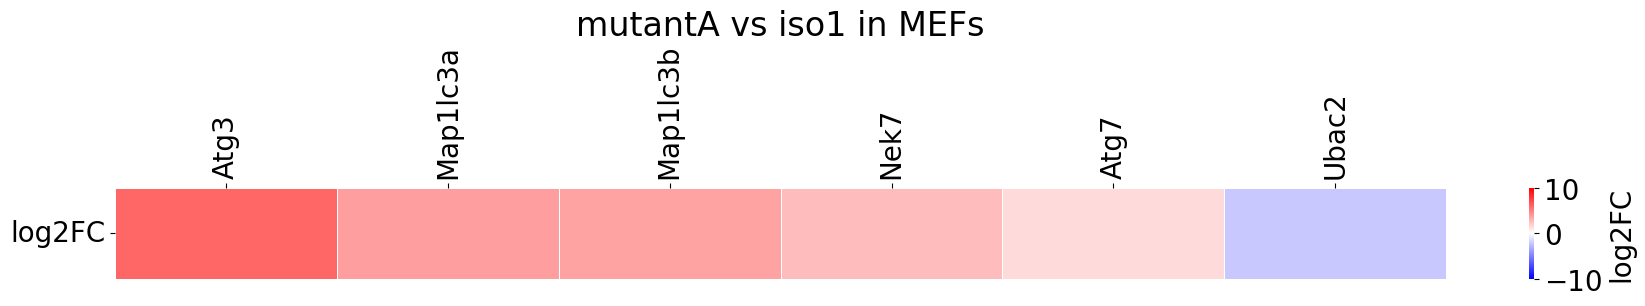

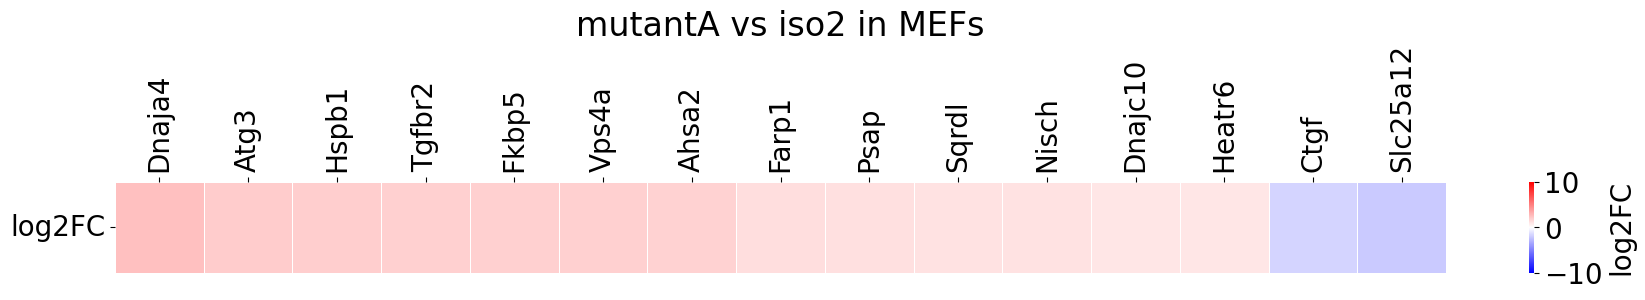


 MUTANTE
             log2FC  adjpvalue (WT/E)    Interaction
Name                                                
Gtlf3b    10.000000          0.000000  ATG7(1)/D522E
Atg3       6.085899          0.001480  ATG7(1)/D522E
Aspn       3.969939          0.040158  ATG7(1)/D522E
Map1lc3a   3.816348          0.002710  ATG7(1)/D522E
Map1lc3b   3.645524          0.024697  ATG7(1)/D522E
Nek7       2.865561          0.001480  ATG7(1)/D522E
Tnpo1      2.414628          0.049270  ATG7(1)/D522E
Atg7       1.705553          0.002315  ATG7(1)/D522E 
             log2FC  adjpvalue (WT/E)    Interaction
Name                                               
Fkbp5     3.531199          0.004260  ATG7(2)/D522E
Atg3      2.782154          0.004260  ATG7(2)/D522E
Dnaja4    2.346937          0.013975  ATG7(2)/D522E
Ptpn23    2.177861          0.005748  ATG7(2)/D522E
Ahsa2     2.156691          0.004260  ATG7(2)/D522E
Psap      1.972511          0.004260  ATG7(2)/D522E
Sqrdl     1.803642          0.004260  ATG7

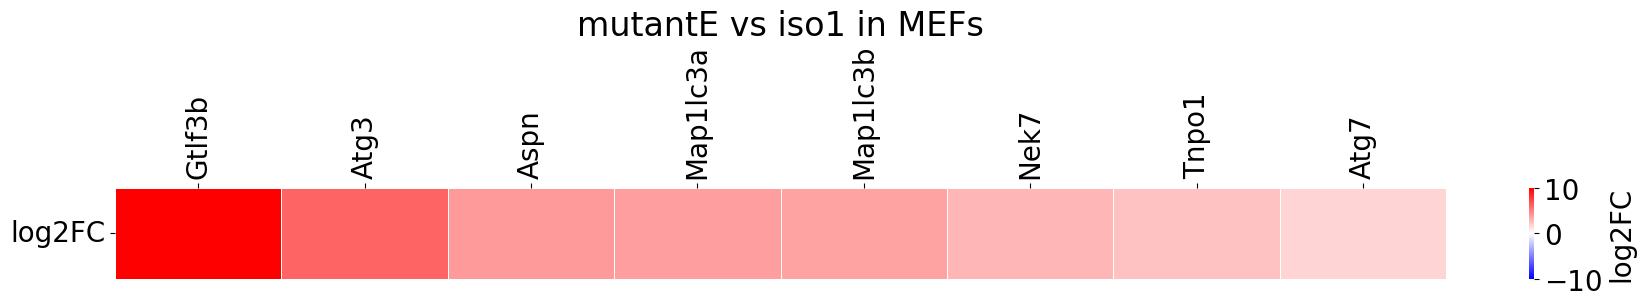

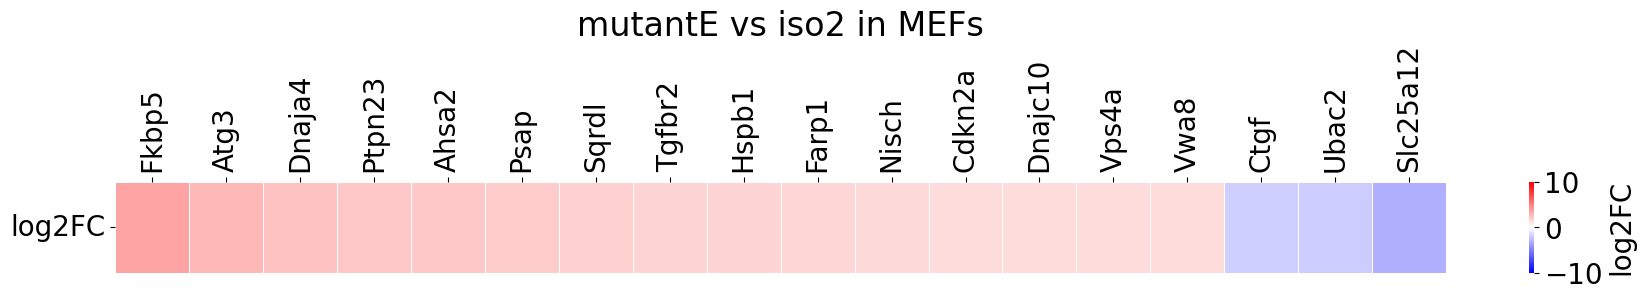

In [9]:
# Difference mutant with wild type for the two isoforms

for mutant in 'mutantA', 'mutantE':
    print('\n', mutant.upper())
  
    df = pandas.read_csv(path+f'mef_all_PPI_{mutant}_vs_isoforms.csv', sep = ";", decimal = ',')

    #drop NAN
    df = df.dropna(axis=0)
    
    #rename and subset isoform1 and isoform 2
    df.rename(columns={df.columns[0]: 'Name', df.columns[1]: 'log2FC'},inplace=True)      
    df_iso1 = df[df['Interaction'].str.startswith("ATG7(1)/")]
    df_iso2 = df[df['Interaction'].str.startswith("ATG7(2)/")]   
    
    #remove duplicated proteins in each isoform and set index
    for df in df_iso1, df_iso2:
        df.drop_duplicates(subset = "Name", inplace = True)
        df.set_index('Name', inplace=True, drop=True)  

    #order by FC
    df_iso1 = df_iso1.sort_values(['log2FC'], ascending = False)
    df_iso2 = df_iso2.sort_values(['log2FC'], ascending = False)
    print(df_iso1, '\n', df_iso2)

    # transpose
    df_iso1 = df_iso1.T
    df_iso2 = df_iso2.T
    
    dfs = df_iso1, df_iso2
    infos = 'iso1', 'iso2'  
    for i in range(len(dfs)):
        df = dfs[i]
        info = infos[i]

        # define data for heatmap
        HeatMap_df = df.loc[['log2FC']].astype(float)

        # Heatmap
        plt.subplots(figsize=(18,2))
        plt.tight_layout()

        fig = seaborn.heatmap(HeatMap_df, annot=False, cmap="bwr", 
                              linewidths=.5, center=0, vmin=-10, vmax=10,
                              cbar_kws={'label': 'log2FC'})

        fig.set(xlabel="", ylabel="")
        fig.xaxis.tick_top()
        
        plt.title(f'{mutant} vs {info} in MEFs')
        plt.xticks(rotation = 90)
        plt.yticks(rotation = 0)

        #save to csv
#         plt.savefig(path2+f'MEF_{info}_vs_{mutant}_ppi_heatmap.svg')

        plt.show()

# III] Huh7

In [13]:
for mutant in 'mutantA', 'mutantE':
    print('\n', mutant.upper())
  
    df = pandas.read_csv(path+f'huh7_all_PPI_{mutant}_vs_isoforms.csv', sep = ";", decimal = ',')

    #drop NAN
    df = df.dropna(axis=0)

    #rename and subset isoform1 and isoform 2
    df.rename(columns={df.columns[0]: 'Name', df.columns[1]: 'log2FC'},inplace=True)      
    df_iso1 = df[df['Interaction'].str.startswith("ATG7(1)/")]
    df_iso2 = df[df['Interaction'].str.startswith("ATG7(2)/")]

    print('iso1 -->', set(df_iso1['Name']))
    print('iso2 -->', set(df_iso2['Name']))


 MUTANTA
iso1 --> {'ARFGAP1', 'GABARAPL1'}
iso2 --> {'NONO', 'AHNAK', 'FKBP5', 'LIMA1', 'MLF2', 'SPTBN1', 'DBN1', 'DSP', 'PLEC', 'SPTAN1', 'ARFGAP1', 'TMEM126A', 'MYH10', 'MYO1B'}

 MUTANTE
iso1 --> {'ATG3'}
iso2 --> set()



 MUTANTA
             log2FC  adj pvalue (WT/A)    Interaction
Name                                                 
ARFGAP1    2.218171           0.006188  ATG7(1)/D522A
GABARAPL1  0.870166           0.040441  ATG7(1)/D522A 
             log2FC  adj pvalue (WT/A)    Interaction
Name                                                
ARFGAP1   1.739604           0.005043  ATG7(2)/D522A
TMEM126A  1.102088           0.005043  ATG7(2)/D522A
AHNAK    -1.304133           0.017146  ATG7(2)/D522A
MYH10    -1.763365           0.015138  ATG7(2)/D522A
MLF2     -1.901085           0.012802  ATG7(2)/D522A
DSP      -2.444992           0.020968  ATG7(2)/D522A
NONO     -2.481496           0.025906  ATG7(2)/D522A
FKBP5    -2.710776           0.012802  ATG7(2)/D522A
LIMA1    -3.065153           0.012802  ATG7(2)/D522A
PLEC     -3.560944           0.012802  ATG7(2)/D522A
MYO1B    -4.159380           0.012802  ATG7(2)/D522A
SPTAN1   -4.311297           0.013713  ATG7(2)/D522A
SPTBN1   -4.623039           0

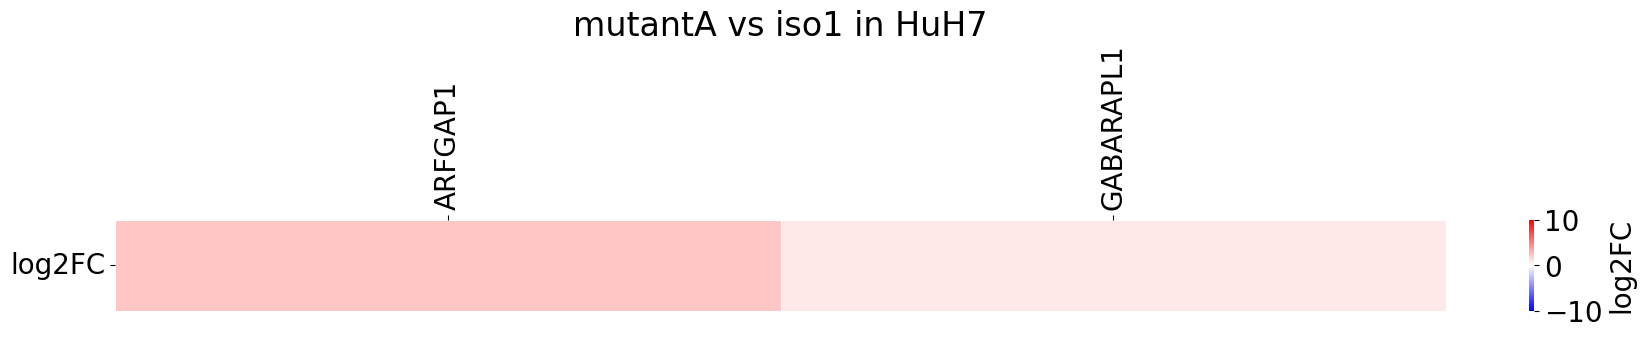

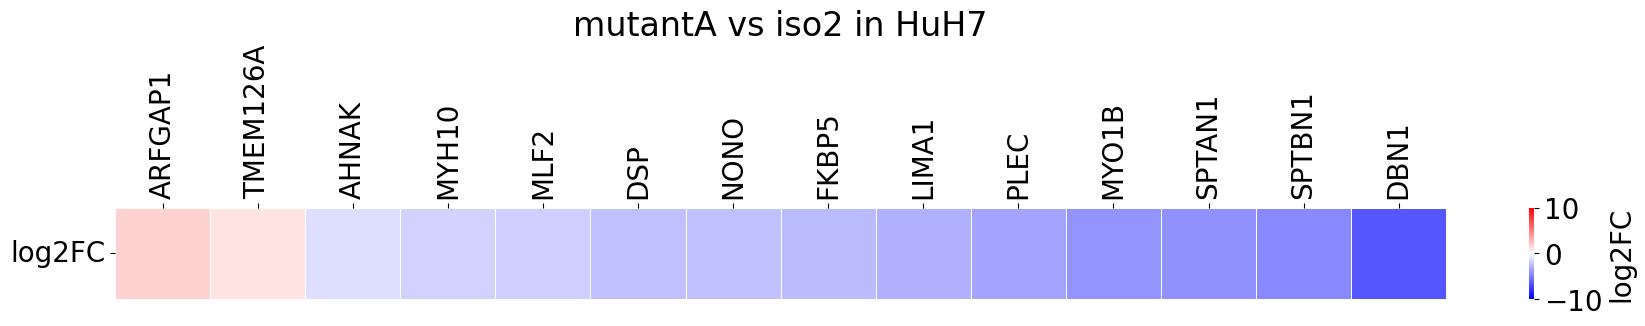


 MUTANTE
        log2FC  adjpvalue (WT/E)    Interaction
Name                                           
ATG3 -1.810147          0.026437  ATG7(1)/D522E 
 Empty DataFrame
Columns: [log2FC, adjpvalue (WT/E), Interaction]
Index: []


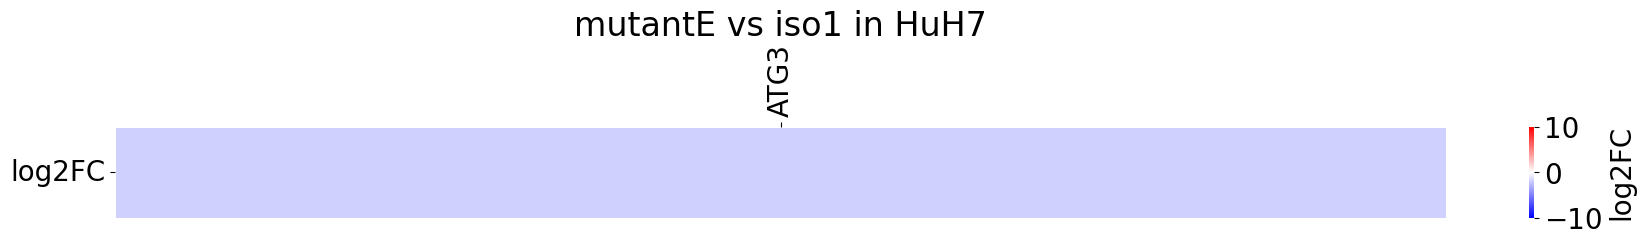

C:\Users\kja11\anaconda3\lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


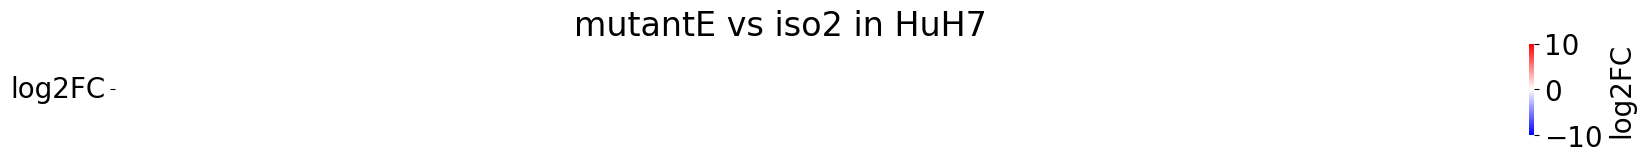

In [7]:
# Difference mutant with wild type for the two isoforms

for mutant in 'mutantA', 'mutantE':
    print('\n', mutant.upper())
  
    df = pandas.read_csv(path+f'huh7_all_PPI_{mutant}_vs_isoforms.csv', sep = ";", decimal = ',')

    #drop NAN
    df = df.dropna(axis=0)
    
    #rename and subset isoform1 and isoform 2
    df.rename(columns={df.columns[0]: 'Name', df.columns[1]: 'log2FC'},inplace=True)      
    df_iso1 = df[df['Interaction'].str.startswith("ATG7(1)/")]
    df_iso2 = df[df['Interaction'].str.startswith("ATG7(2)/")]   
    
    #remove duplicated proteins in each isoform and set index
    for df in df_iso1, df_iso2:
        df.drop_duplicates(subset = "Name", inplace = True)
        df.set_index('Name', inplace=True, drop=True)  

    #order by FC
    df_iso1 = df_iso1.sort_values(['log2FC'], ascending = False)
    df_iso2 = df_iso2.sort_values(['log2FC'], ascending = False)
    print(df_iso1, '\n', df_iso2)

    # transpose
    df_iso1 = df_iso1.T
    df_iso2 = df_iso2.T
    
    dfs = df_iso1, df_iso2
    infos = 'iso1', 'iso2'  
    for i in range(len(dfs)):
        df = dfs[i]
        info = infos[i]

        # define data for heatmap
        HeatMap_df = df.loc[['log2FC']].astype(float)

        # Heatmap
        plt.subplots(figsize=(18,2))
        plt.tight_layout()

        fig = seaborn.heatmap(HeatMap_df, annot=False, cmap="bwr", 
                              linewidths=.5, center=0, vmin=-10, vmax=10,
                              cbar_kws={'label': 'log2FC'})

        fig.set(xlabel="", ylabel="")
        fig.xaxis.tick_top()
        
        plt.title(f'{mutant} vs {info} in HuH7')
        plt.xticks(rotation = 90)
        plt.yticks(rotation = 0)

        #save to csv
        plt.savefig(path2+f'HuH7_{info}_vs_{mutant}_ppi_heatmap.svg')
        plt.show()

In [ ]:
value_both_mut = []

for mutant in 'mutantA', 'mutantE':
    print(mutant.upper())

    df = pandas.read_csv(path+f'huh7_all_PPI_{mutant}_vs_isoforms.csv', sep = ";", decimal = ',')
    print(df.head(), '\n')

    #drop NAN
    df = df.dropna(axis=0)
    
    #rename and set index
    df.rename(columns={df.columns[0]: 'Name', df.columns[1]: 'log2FC', df.columns[2]: 'adjpvalue'},inplace=True)      
    df.set_index('Name', inplace=True, drop=True)
    
    #order
    df = df.sort_values(['log2FC'], ascending = False)
    print(df, '\n')

    #Heatmap preparation
    value_both_mut.append(df)

    
#One graph for the 2 mutations
df = pandas.concat([value_both_mut[0], value_both_mut[1]], axis=0)  
df = df.T

HeatMap_df = df.loc[['log2FC']].astype(float)

#Heatmap preparation
plt.subplots(figsize=(18,2))
plt.tight_layout()

fig = seaborn.heatmap(HeatMap_df, annot=False, cmap="bwr", linewidths=.5, center=0, vmin=-10, vmax=10,
               cbar_kws={'label': 'log2FC'})

fig.set(xlabel="", ylabel="")
fig.xaxis.tick_top()

plt.xticks(rotation = 90)
plt.yticks(rotation = 0)

#save to csv
plt.savefig(path2+f'HUH7_mutA-E_ppi_heatmap.svg')

plt.show()